回归问题

（1）请详细阐述线性回归模型的最小二乘法表达

答：
![jupyter](./1.4.png)
最小二乘估计：                 
   我们需要衡量真实值$y_i$与线性回归模型的预测值$w^Tx_i$之间的差距，在这里我们和使用二范数的平方和L(w)来描述这种差距，即：                      
   $$
   L(w) = \sum\limits_{i=1}^{N}||w^Tx_i-y_i||_2^2=\sum\limits_{i=1}^{N}(w^Tx_i-y_i)^2 = (w^TX^T-Y^T)(w^TX^T-Y^T)^T = w^TX^TXw - 2w^TX^TY+YY^T\\
   因此，我们需要找到使得L(w)最小时对应的参数w，即：\\
   \hat{w} = argmin\;L(w)\\
   为了达到求解最小化L(w)问题，我们应用高等数学的知识，使用求导来解决这个问题： \\
   \frac{\partial L(w)}{\partial w} = 2X^TXw-2X^TY = 0,因此： \\
   \hat{w} = (X^TX)^{-1}X^TY
   $$              

（2）在线性回归模型中，极大似然估计与最小二乘估计有什么联系和区别

答：
两者相互等价。

在回归算法中,用最小二乘法和最大似然估计求解损失函数时,最大似然法中，通过选择参数，使已知数据在某种意义下最有可能出现，而某种意义通常指似然函数最大，而似然函数又往往指数据的概率分布函数。

与最小二乘法不同的是，最大似然法需要已知这个概率分布函数，这在实践中是很困难的。
一般假设其满足正态分布函数的特性，在这种情况下，最大似然估计和最小二乘估计相同。

最小二乘法以估计值与观测值的差的平方和作为损失函数，
极大似然法则是以最大化目标值的似然概率函数为目标函数，
从概率统计的角度处理线性回归并在似然概率函数为高斯函数的假设下同最小二乘建立了的联系。

（3）为什么多项式回归在实际问题中的表现不是很好

在这一简单的模型中，单变量线性回归的任务是建立起单个输入的独立变量与因变量之间的线性关系；而多变量回归则意味着要建立多个独立输入变量与输出变量之间的关系。除此之外，非线性的多项式回归则将输入变量进行一系列非线性组合以建立与输出之间的关系，但这需要拥有输入输出之间关系的一定知识。训练回归算法模型一般使用随机梯度下降法(SGD)。

优点：

建模迅速，对于小数据量、简单的关系很有效；

线性回归模型十分容易理解，有利于决策分析。

缺点：

对于非线性数据或者数据特征间具有相关性多项式回归难以建模；

难以很好地表达高度复杂的数据。

（7）使用CH1机器学习数学基础所学的内容，找到一个具体的数据集，使用线性回归模型拟合模型，要求不能使用sklearn，只能使用pyhton与numpy。

答：这里具体的数据集是什么意思呀？我是需要直接构造一个数据集还是可以用鸢尾花或者波士顿数据集？

【formula方法】
w:1.3497273417477647, b:0.49456239045761374, square loss:71.12587189347657
【matrix方法】
w:[1.34972734], b:0.49456239045761363, square loss:71.12587189347657


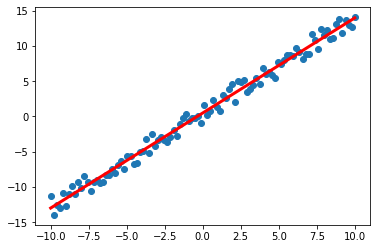

【matrix方法】
w:[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713], b:22.53280632411067, square loss:11078.784577954979
第1202次迭代，损失平方和为11078.784655550839，损失前后差为9.950799721991643e-07
【gradient方法】
w:[-0.92807466  1.08144289  0.14050985  0.68179554 -2.05665046  2.67430097
  0.01940617 -3.10407269  2.66123326 -2.07566251 -2.0605703   0.84926148
 -3.74358916], b:22.532806324110666, square loss:11078.784655550839


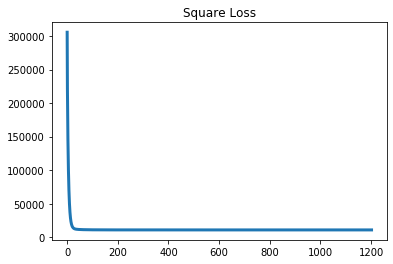

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression(object):
    """simple linear regression & multivariate linear regression"""
    def __init__(self):
        self.w = 0                  #斜率
        self.b = 0                  #截距
        self.sqrLoss = 0            #最小均方误差
        self.trainSet = 0           #训练集特征
        self.label = 0              #训练集标签
        self.learning_rate = None   #学习率
        self.n_iters = None         #实际迭代次数
        self.lossList = []          #梯度下降每轮迭代的误差列表
    
    def train(self, X, y, method, learning_rate=0.1, n_iters=1000):
        """fit model
        
        Parameters:
        -----------
        X: array-like, 2D shape
            训练集特征
        y: array-like, 1D shape
            训练集标签
        method: formula, matrix, gradient
            训练的方法，可选公式求解法，矩阵求解法，梯度下降法
            公式求解法仅适用于一元线性回归(simple linear regression)
        
        results:
        --------
        w: 1D array or float
            线性回归系数，以array形式返回
            若为一元线性回归，则返回float
        b: float
            线性回归的截距，返回float
        sqrLoss: float
            平方损失和，训练集实际值与预测值的误差平方和
        lossList: List[float]
            记录每轮迭代的平方损失和列表，仅限梯度下降法生成
        """
        if X.ndim < 2:
            raise ValueError("X must be 2D array-like!")
        self.trainSet = X
        self.label = y
        if method.lower() == "formula":
            self.__train_formula()
        elif method.lower() == "matrix":
            self.__train_matrix()
        elif method.lower() == "gradient":
            self.__train_gradient(learning_rate, n_iters)
        else:
            raise ValueError("method value not found!")
        return
            
    #公式求解法(仅适用于一元线性回归)
    def __train_formula(self):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet.flatten()
        y = self.label
        Xmean = np.mean(X)
        ymean = np.mean(y)
        #求w
        self.w = (np.dot(X, y) - n_samples*Xmean*ymean)/(np.power(X,2).sum() - n_samples*Xmean**2)
        #求b
        self.b = ymean - self.w*Xmean
        #求误差
        self.sqrLoss = np.power((y-np.dot(X,self.w) - self.b), 2).sum()
        return
    
    #矩阵求解法
    def __train_matrix(self):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #合并w和b，在X尾部添加一列全是1的特征
        X2 = np.hstack((X, np.ones((n_samples, 1))))
        #求w和b
        EX = np.linalg.inv(np.dot(X2.T,X2))
        what = np.dot(np.dot(EX,X2.T),y)
        self.w = what[:-1]
        self.b = what[-1]
        self.sqrLoss = np.power((y-np.dot(X2,what).flatten()), 2).sum()
        return
        
    #梯度下降法
    def __train_gradient(self, learning_rate, n_iters, minloss=1.0e-6):
        n_samples, n_features = self.trainSet.shape
        X = self.trainSet
        y = self.label
        #初始化迭代次数为0，初始化w0，b0为1，初始化误差平方和以及迭代误差之差
        n = 0
        w = np.ones(n_features)
        b = 1
        sqrLoss0 = np.power((y-np.dot(X,w).flatten()-b), 2).sum()
        self.lossList.append(sqrLoss0)
        deltaLoss = np.inf
        while (n<n_iters) and (sqrLoss0>minloss) and (abs(deltaLoss)>minloss):
            #求w和b的梯度
            ypredict = np.dot(X, w) + b
            gradient_w = -1.*np.dot((y - ypredict), X)/n_samples
            gradient_b = -1.*sum(y - ypredict)/n_samples
            #更新w和b
            w = w - learning_rate * gradient_w
            b = b - learning_rate * gradient_b
            #求更新后的误差和更新前后的误差之差
            sqrLoss1 = np.power((y-np.dot(X,w).flatten()-b), 2).sum()
            deltaLoss = sqrLoss0 - sqrLoss1
            sqrLoss0 = sqrLoss1
            self.lossList.append(sqrLoss0)
            n += 1
        print("第{}次迭代，损失平方和为{}，损失前后差为{}".format(n, sqrLoss0, deltaLoss))
        self.w = w
        self.b = b
        self.sqrLoss = sqrLoss0
        self.learning_rate = learning_rate
        self.n_iters = n+1
        return




def simpleLR(w, b, size=100):
    X = np.expand_dims(np.linspace(-10, 10, size), axis=1)
    y = X.flatten()*w + b + (np.random.random(size)-1)*3
    #公式法求解
    lr1 = LinearRegression()
    lr1.train(X, y, method='formula')
    print("【formula方法】\nw:{}, b:{}, square loss:{}".format(lr1.w, lr1.b, lr1.sqrLoss))
    #矩阵法求解
    lr2 = LinearRegression()
    lr2.train(X, y, method='Matrix')
    print("【matrix方法】\nw:{}, b:{}, square loss:{}".format(lr2.w, lr2.b, lr2.sqrLoss))
    #画图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X, y)
    ax.plot(X, X*lr2.w+lr2.b, color='r', linewidth=3)
    plt.show()
    return
    
def multivariateLR():
    from sklearn.datasets import load_boston
    X, y = load_boston(True)
    #将特征X标准化，方便收敛
    X = (X - X.mean(axis=0))/X.std(axis=0)
    #矩阵法求解
    lr1 = LinearRegression()
    lr1.train(X, y, method='Matrix')
    print("【matrix方法】\nw:{}, b:{}, square loss:{}".format(lr1.w, lr1.b, lr1.sqrLoss))
    #梯度下降法求解
    lr2 = LinearRegression()
    lr2.train(X, y, method='Gradient', learning_rate=0.1, n_iters=5000)
    print("【gradient方法】\nw:{}, b:{}, square loss:{}".format(lr2.w, lr2.b, lr2.sqrLoss))
    #画梯度下降的误差下降图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(range(lr2.n_iters), lr2.lossList, linewidth=3)
    ax.set_title("Square Loss")
    plt.show()
    return
    
    
if __name__ == "__main__":
    #1、先用公式法和矩阵法测试下一元线性回归
    simpleLR(1.34, 2.08)
    #2、再用矩阵法和梯度下降法测试下多元线性回归
    multivariateLR()